# Zapiski in testiranje tekom projekta.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Uvoz podatkov
podatki = pd.read_csv("PametniDomPodatki\HomeC.csv")

# Izpis prvih 5 vrstic
print(podatki.head())


C:\Users\Leon\AppData\Local\Temp\ipykernel_7100\2239309266.py:2: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  podatki = pd.read_csv("PametniDomPodatki\HomeC.csv")


         time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0  1451624400  0.932833  0.003483            0.932833         0.000033   
1  1451624401  0.934333  0.003467            0.934333         0.000000   
2  1451624402  0.931817  0.003467            0.931817         0.000017   
3  1451624403  1.022050  0.003483            1.022050         0.000017   
4  1451624404  1.139400  0.003467            1.139400         0.000133   

   Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0        0.020700        0.061917          0.442633     0.124150   
1        0.020717        0.063817          0.444067     0.124000   
2        0.020700        0.062317          0.446067     0.123533   
3        0.106900        0.068517          0.446583     0.123133   
4        0.236933        0.063983          0.446533     0.122850   

   Wine cellar [kW]  ...  visibility  summary  apparentTemperature  pressure  \
0          0.006983  ...        10.0    Clear                29.26

In [4]:
#izpis imena stolpcev
print(podatki.columns)
print(type(podatki["time"]))

# Convert Timestamps
podatki['time'] = pd.to_datetime(podatki['time'][0:503910], unit='s')

print(podatki['time'])


Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')
<class 'pandas.core.series.Series'>
0        2016-01-01 05:00:00
1        2016-01-01 05:00:01
2        2016-01-01 05:00:02
3        2016-01-01 05:00:03
4        2016-01-01 05:00:04
                 ...        
503906   2016-01-07 00:57:36
503907   2016-01-07 00:57:36
503908   2016-01-07 00:57:36
503909   2016-01-07 00:57:36
503910                   NaT
Name: time, Length: 503911, dtype: datetime64[ns]


C:\Users\Leon\AppData\Local\Temp\ipykernel_7100\1147145154.py:6: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  podatki['time'] = pd.to_datetime(podatki['time'][0:503910], unit='s')


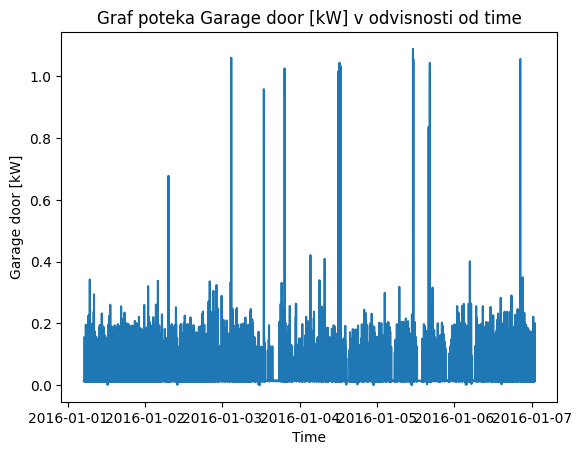

In [5]:
# #graf poteka Microwave v odvisnosti od time
plt.figure()
plt.plot(podatki['time'][0:503910], podatki['Garage door [kW]'][0:503910])
plt.xlabel("Time")
plt.ylabel("Garage door [kW]")
plt.title("Graf poteka Garage door [kW] v odvisnosti od time")
plt.show()



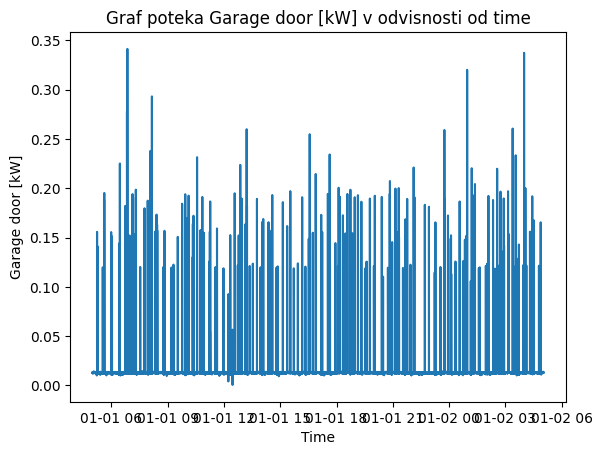

In [6]:
#graph for one day = 86400s
plt.figure()
plt.plot(podatki['time'][0:86500], podatki['Garage door [kW]'][0:86500])
plt.xlabel("Time")
plt.ylabel("Garage door [kW]")
plt.title("Graf poteka Garage door [kW] v odvisnosti od time")
plt.show()

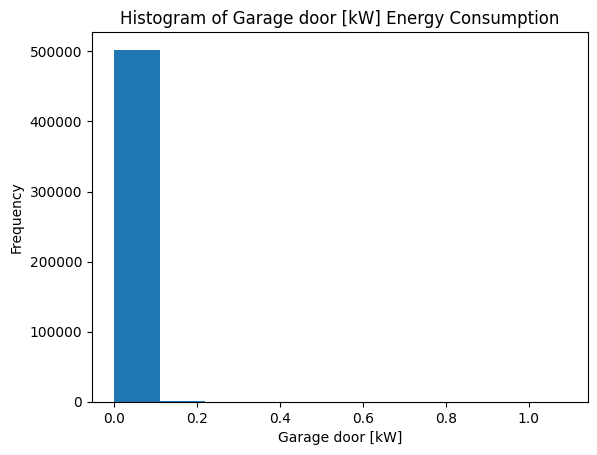

In [7]:
# Plot the histogram of garage energy consumption
plt.figure()
plt.hist(podatki['Garage door [kW]'][0:503910])
plt.xlabel("Garage door [kW]")
plt.ylabel("Frequency")
plt.title("Histogram of Garage door [kW] Energy Consumption")
plt.show()

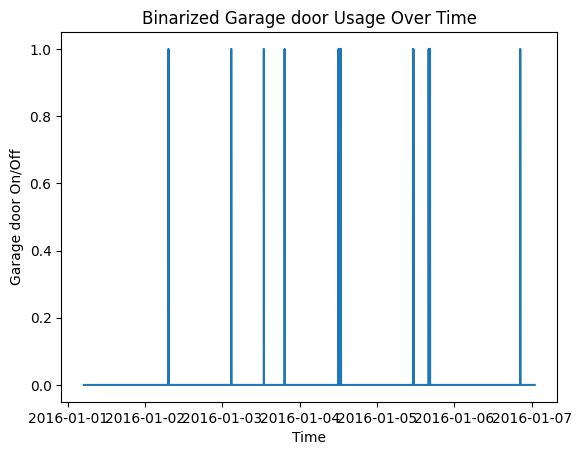

In [8]:
# Determine the threshold for binarization
# Assuming the values below a certain threshold represent the "off" state
threshold = 0.5  # This is an example, you may need to adjust based on the histogram

# Binarize the microwave energy consumption data
podatki['Garage door [kW] Binary'] = (podatki['Garage door [kW]'][0:503910] > threshold).astype(int)

# Plot the binarized microwave data
plt.figure()
plt.plot(podatki['time'][0:503910], podatki['Garage door [kW] Binary'][0:503910])
plt.xlabel("Time")
plt.ylabel("Garage door On/Off")
plt.title("Binarized Garage door Usage Over Time")
plt.show()

In [9]:
podatki['Garage door [kW]'].resample("h").mean().iloc[:24].plot()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

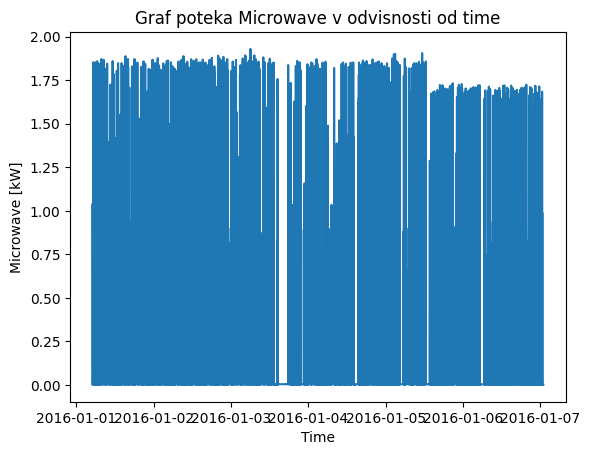

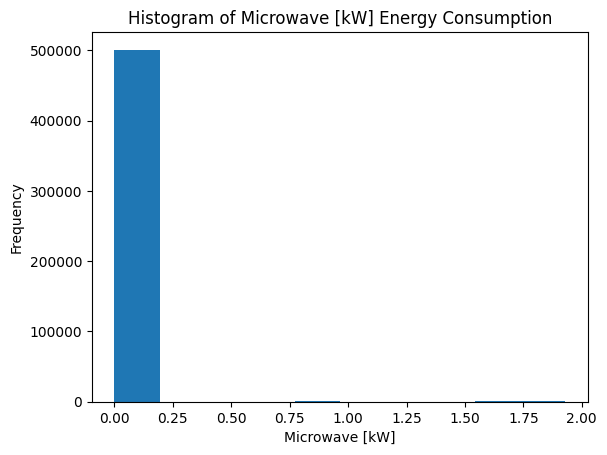

In [ ]:

# #graf poteka Microwave v odvisnosti od time
plt.figure()
plt.plot(podatki['time'][0:503910], podatki['Microwave [kW]'][0:503910])
plt.xlabel("Time")
plt.ylabel("Microwave [kW]")
plt.title("Graf poteka Microwave v odvisnosti od time")

# Plot the histogram of microwave energy consumption
plt.figure()
plt.hist(podatki['Microwave [kW]'][0:503910])
plt.xlabel("Microwave [kW]")
plt.ylabel("Frequency")
plt.title("Histogram of Microwave [kW] Energy Consumption")
plt.show()



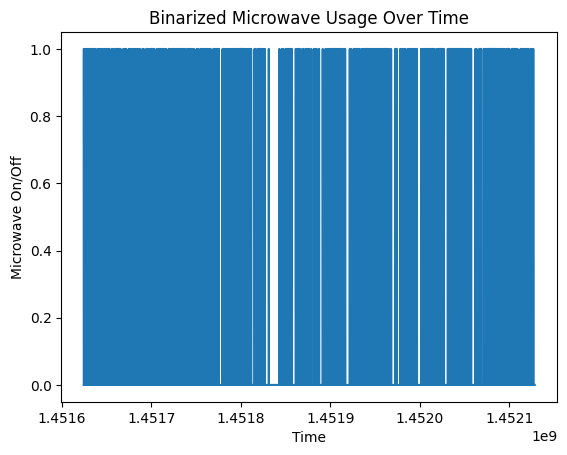

In [ ]:
# Determine the threshold for binarization
# Assuming the values below a certain threshold represent the "off" state
threshold = 1  # This is an example, you may need to adjust based on the histogram

# Binarize the microwave energy consumption data
podatki['Microwave [kW] Binary'] = (podatki['Microwave [kW]'][0:503910] > threshold).astype(int)

# Plot the binarized microwave data
plt.figure()
plt.plot(podatki['time'][0:503910], podatki['Microwave [kW] Binary'][0:503910])
plt.xlabel("Time")
plt.ylabel("Microwave On/Off")
plt.title("Binarized Microwave Usage Over Time")
plt.show()

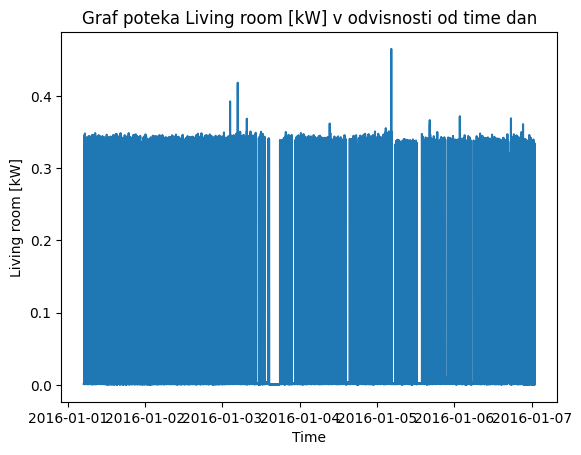

In [ ]:


#graph for one day = 86400s
plt.figure()
plt.plot(podatki['time'][0:503910], podatki['Living room [kW]'][0:503910])
plt.xlabel("Time")
plt.ylabel("Living room [kW]")
plt.title("Graf poteka Living room [kW] v odvisnosti od time dan")
plt.show()

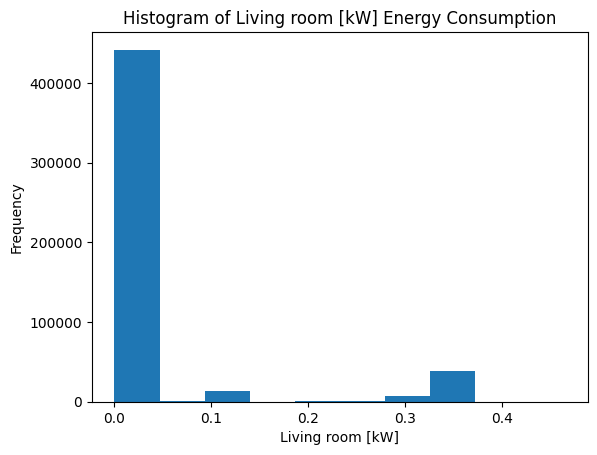

In [ ]:
plt.hist(podatki['Living room [kW]'][0:503910])
plt.xlabel("Living room [kW]")
plt.ylabel("Frequency")
plt.title("Histogram of Living room [kW] Energy Consumption")
plt.show()

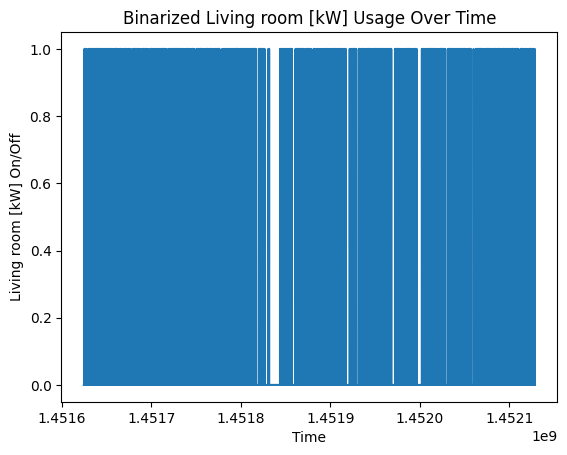

In [ ]:
# Determine the threshold for binarization
# Assuming the values below a certain threshold represent the "off" state
threshold = 0.25  # This is an example, you may need to adjust based on the histogram

# Binarize the microwave energy consumption data
podatki['Living room [kW] Binary'] = (podatki['Living room [kW]'][0:503910] > threshold).astype(int)

# Plot the binarized microwave data
plt.figure()
plt.plot(podatki['time'][0:503910], podatki['Living room [kW] Binary'][0:503910])
plt.xlabel("Time")
plt.ylabel("Living room [kW] On/Off")
plt.title("Binarized Living room [kW] Usage Over Time")
plt.show()

(503911, 5)
[0 0 1]


C:\Users\Leon\AppData\Local\Temp\ipykernel_33040\3681749566.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_binary_array[:, 0], data_binary_array[:, 1], c=y_pred, cmap='viridis')
C:\Users\Leon\AppData\Local\Temp\ipykernel_33040\3681749566.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_binary_array[:, 0], data_binary_array[:, 1], c=y_pred, cmap='viridis')


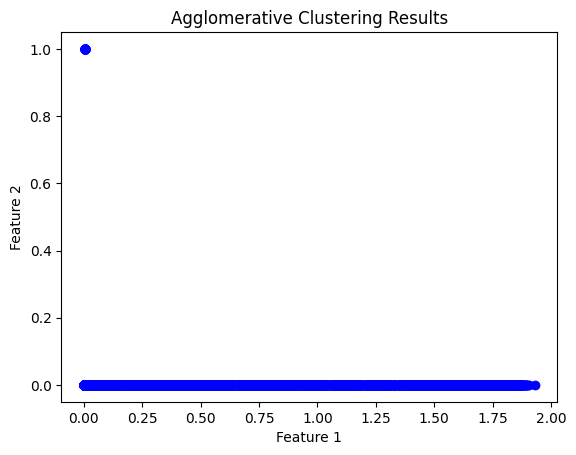

In [ ]:
#binarne ON OFF vrednosti za garage door in microwave
microwawe_bin = podatki['Microwave [kW] Binary'][0:503910]
garage_door_bin = podatki['Garage door [kW] Binary'][0:503910]
living_room_bin = podatki['Living room [kW] Binary'][0:503910]


from sklearn.cluster import AgglomerativeClustering

data_binary= pd.DataFrame({'Microwave': microwawe_bin, 'Microwave': podatki["Microwave [kW]"], 'Garage door': garage_door_bin, 'garage door [kw]': podatki["Garage door [kW]"], 'Living room': living_room_bin, 'Living room [kW]': podatki["Living room [kW]"]})
data_binary_array = data_binary.to_numpy()
data_binary_array
print(data_binary_array.shape)


# define the model
model = AgglomerativeClustering(n_clusters=2)


# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
y_pred = agg_clustering.fit_predict([microwawe_bin, garage_door_bin, living_room_bin])

print(y_pred)

# Plot the results
plt.scatter(data_binary_array[:, 0], data_binary_array[:, 1], c=y_pred, cmap='viridis')
plt.title("Agglomerative Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(y_pred)
plt.title("Dendrogram for Sample Data")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

TypeError: Linkage matrix 'Z' must contain doubles.

<Figure size 1000x700 with 0 Axes>

(503911, 3)
[0 0 1]


C:\Users\Leon\AppData\Local\Temp\ipykernel_33040\773507024.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_binary_array[:, 0], data_binary_array[:, 1], data_binary_array[:, 2], c=y_pred, cmap='viridis')
C:\Users\Leon\AppData\Local\Temp\ipykernel_33040\773507024.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_binary_array[:, 0], data_binary_array[:, 1], data_binary_array[:, 2], c=y_pred, cmap='viridis')


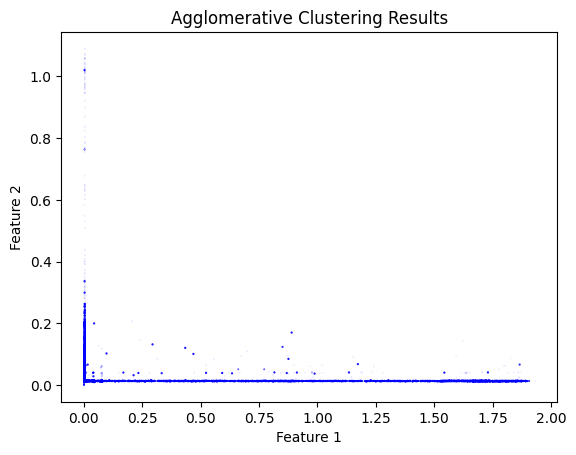

TypeError: Linkage matrix 'Z' must contain doubles.

<Figure size 1000x700 with 0 Axes>

In [ ]:

data_binary= pd.DataFrame({'Microwave': podatki["Microwave [kW]"], 'garage door [kw]': podatki["Garage door [kW]"], 'Living room [kW]': podatki["Living room [kW]"]})
data_binary_array = data_binary.to_numpy()
print(data_binary_array.shape)


model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model_fit = model.fit(data_binary_array[0:1000])

print(y_pred)

# Plot the results
plt.scatter(data_binary_array[:, 0], data_binary_array[:, 1], data_binary_array[:, 2], c=y_pred, cmap='viridis')
plt.title("Agglomerative Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


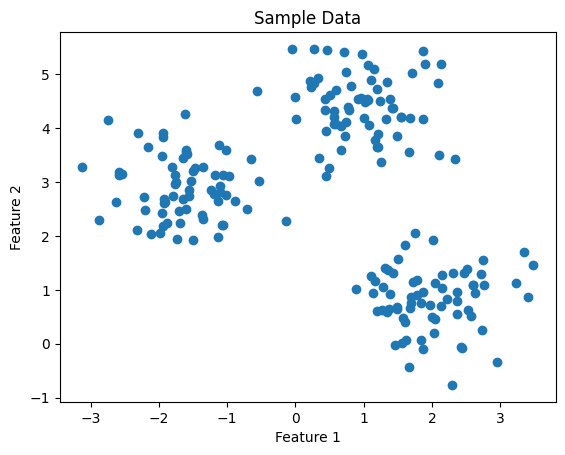

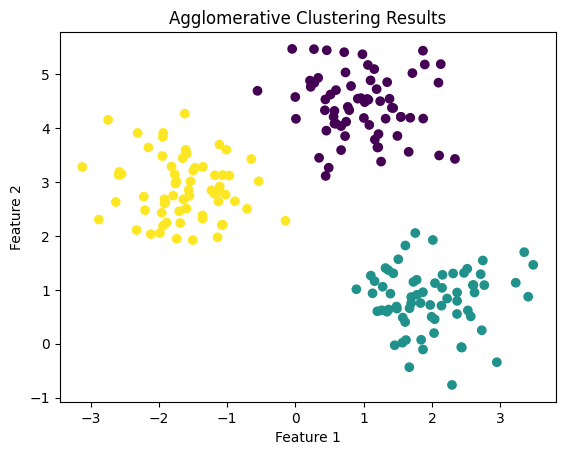

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate sample data
X, _ = make_blobs(n_samples=200, centers=3, cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1])
plt.title("Sample Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
y_pred = agg_clustering.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.title("Agglomerative Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
# Uvoz podatkov
dataset = pd.read_csv("PametniDomPodatki\HomeC.csv")
dataset.columns

time_index = pd.date_range('2016-01-01 05:00', periods=len(dataset),  freq='min')  
time_index = pd.DatetimeIndex(time_index)
dataset = dataset.set_index(time_index)
dataset = dataset.drop(['time'], axis=1)
dataset.iloc[np.r_[0:5,-5:0]].iloc[:,0]


#dataset = podatki.resample('H').mean()
#podatki['Microwave [kW]'].resample("h").mean().iloc[:24].plot()


C:\Users\Leon\AppData\Local\Temp\ipykernel_33040\1835724427.py:2: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("PametniDomPodatki\HomeC.csv")


2016-01-01 05:00:00    0.932833
2016-01-01 05:01:00    0.934333
2016-01-01 05:02:00    0.931817
2016-01-01 05:03:00    1.022050
2016-01-01 05:04:00    1.139400
2016-12-16 03:26:00    1.599333
2016-12-16 03:27:00    1.924267
2016-12-16 03:28:00    1.978200
2016-12-16 03:29:00    1.990950
2016-12-16 03:30:00         NaN
Name: use [kW], dtype: float64

<Axes: >

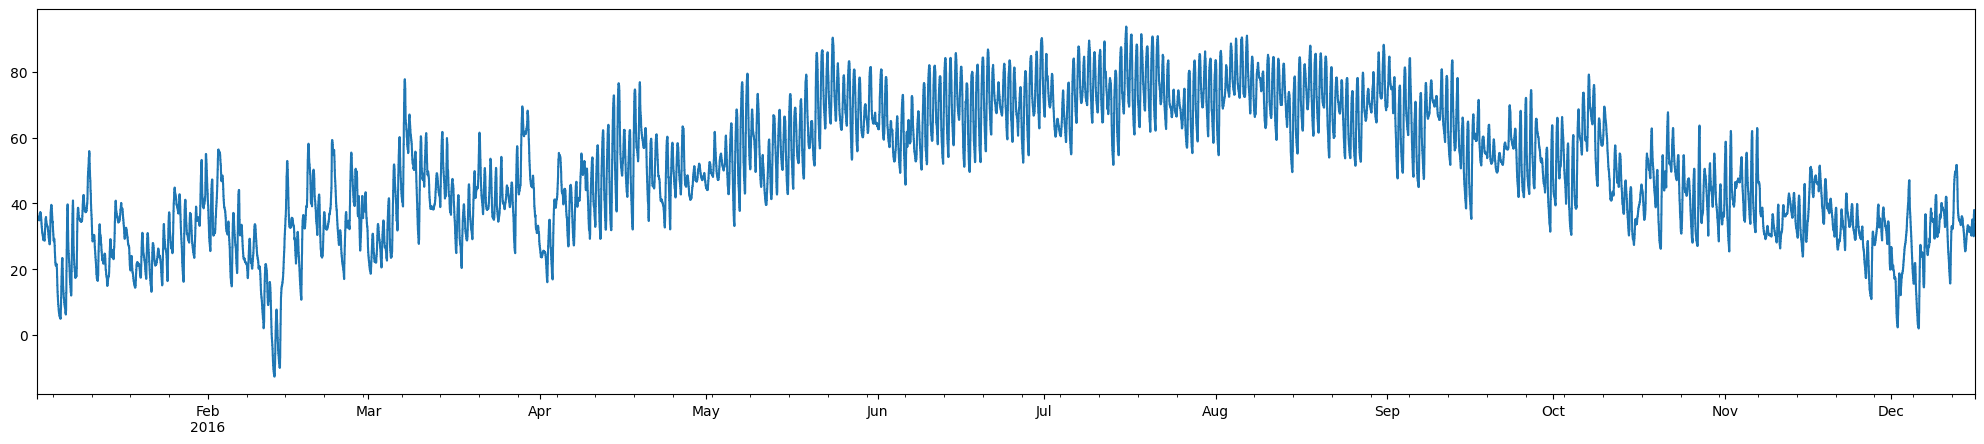

In [ ]:
dataset['temperature'].plot(figsize=(25,5))


In [ ]:
dataset.columns


Index(['use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

NameError: name 'dataset' is not defined

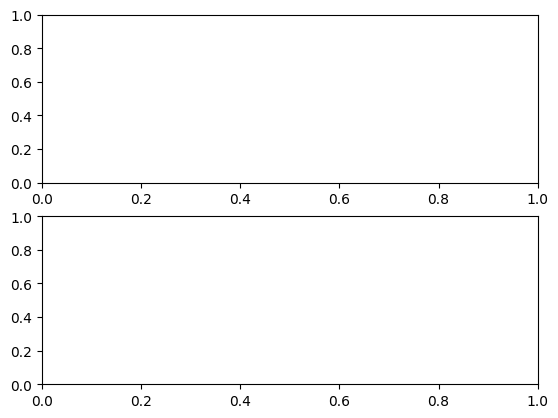

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=1)
dataset['use [kW]'].resample('D').mean().plot(ax=axes[0])
#dataset['House overall [kW]'].resample('D').mean().plot(ax=axes[1])
dataset['Living room [kW]'].resample('D').mean().plot(ax=axes[1], title='Living room [kW]')

<Axes: >

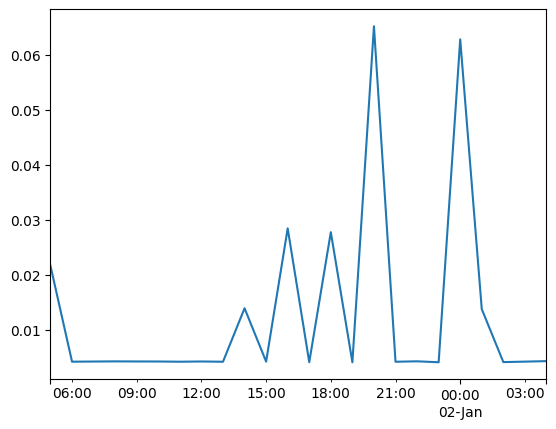

In [ ]:
#dataset['Microwave [kW]'].iloc[:86500].plot()
dataset['Microwave [kW]'].resample("h").mean().iloc[:24].plot()


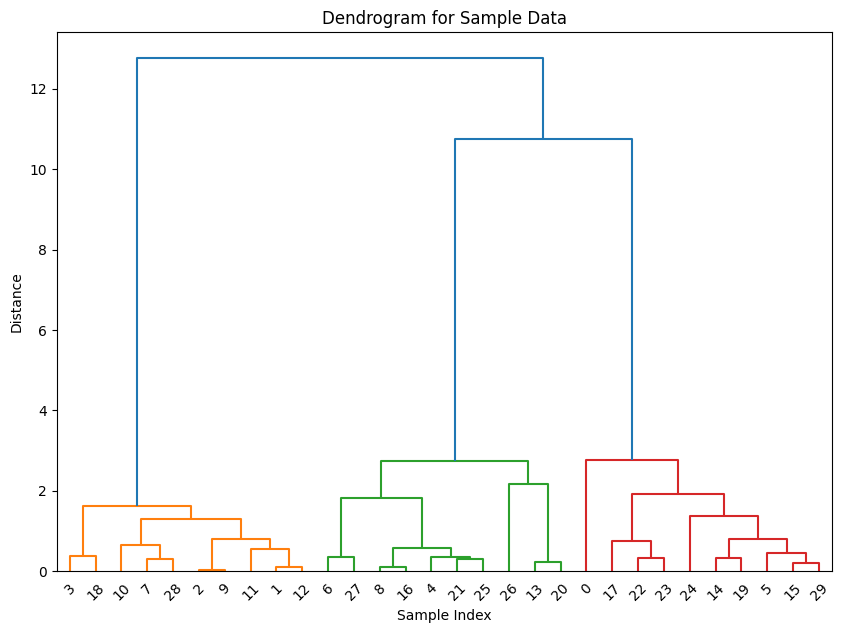

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=30, centers=3, cluster_std=0.60, random_state=0)

# Perform hierarchical clustering
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram for Sample Data")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

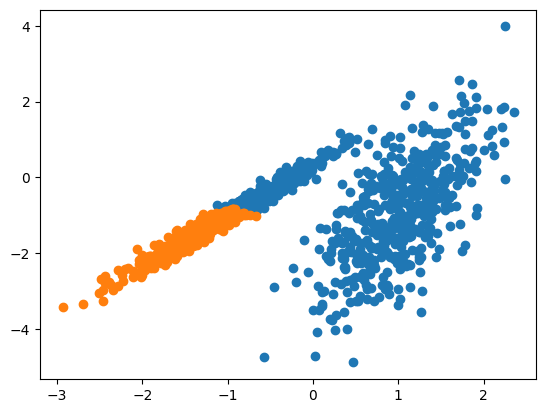

In [ ]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

(5000, 2)
(1000, 2)


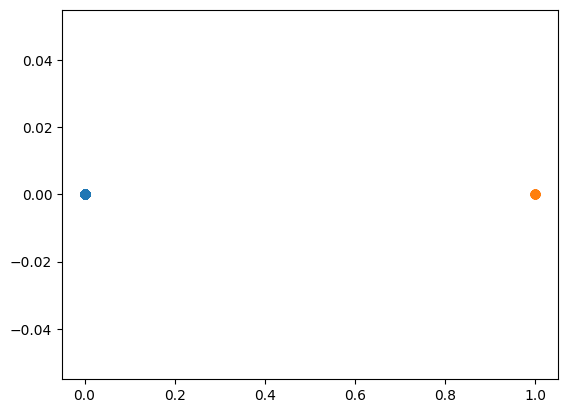

In [ ]:
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)


#binarne ON OFF vrednosti za garage door in microwave 503910
microwawe_bin = podatki['Microwave [kW] Binary'][0:5000]
garage_door_bin = podatki['Garage door [kW] Binary'][0:5000]
X

data_binary= pd.DataFrame({'Microwave': microwawe_bin, 'Garage door': garage_door_bin})
data_binary_array = data_binary.to_numpy()
data_binary_array
print(data_binary_array.shape)
print(X.shape)

# define the model
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(data_binary_array)
# retrieve unique clusters
clusters = unique(yhat)


for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(data_binary_array[row_ix, 0], data_binary_array[row_ix, 1])
# show the plot
pyplot.show()

In [ ]:
# Perform hierarchical clustering
Z = linkage(X, method='ward')
print(Z.shape)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(yhat)
plt.title("Dendrogram for Sample Data")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

(999, 4)


TypeError: Linkage matrix 'Z' must contain doubles.

<Figure size 1000x700 with 0 Axes>

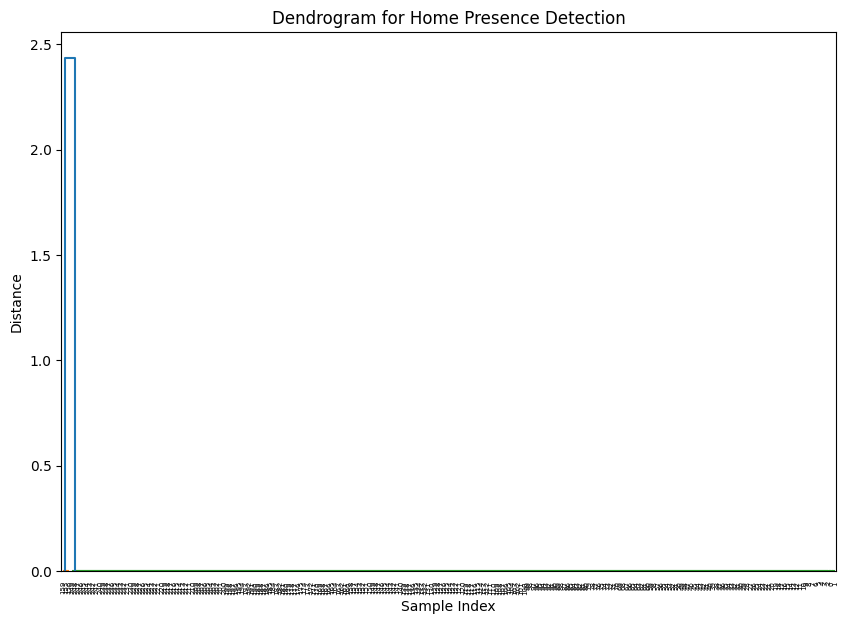

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
#binarne ON OFF vrednosti za garage door in microwave
microwawe_bin = podatki['Microwave [kW] Binary'][0:503910]
garage_door_bin = podatki['Garage door [kW] Binary'][0:503910]
living_room_bin = podatki['Living room [kW] Binary'][0:503910]

# Podatke združimo v eno tabelo za clustering
# Predpostavimo, da imamo binarizirane podatke za luči in televizor
# Zamenjajte z vašimi dejanskimi podatki
# podatki['Lights Binary'] = (podatki['Lights [kW]'] > threshold_lights).astype(int)
# podatki['TV Binary'] = (podatki['TV [kW]'] > threshold_tv).astype(int)


# Ustvarimo matriko značilnosti za clustering
features = podatki[[ 'Garage door [kW] Binary','Microwave [kW] Binary']][5000:5250]

# Izvedemo hierarhično grozdenje
Z = linkage(features, method='ward')

# Narišemo dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram for Home Presence Detection")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

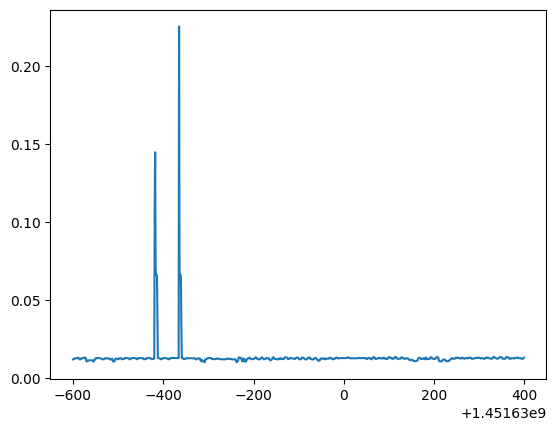

In [ ]:
plt.plot(podatki['time'][5000:6000], podatki['Garage door [kW]'][5000:6000])


In [ ]:
import pandas as pd
import numpy as np

# Nastavimo naključni generator za ponovljivost rezultatov
np.random.seed(42)

# Ustvarimo časovne žige
time = pd.date_range(start='2023-01-01', periods=1000, freq='H')

# Ustvarimo naključne podatke za porabo naprav
microwave_usage = np.random.choice([0, 0.1, 0.2, 0.3, 0], size=1000)
lights_usage = np.random.choice([0, 0.5, 1.0, 0, 0], size=1000)
tv_usage = np.random.choice([0, 0.2, 0.5, 0.7, 0], size=1000)

# Združimo v DataFrame
podatki = pd.DataFrame({
    'time': time,
    'Microwave [kW]': microwave_usage,
    'Lights [kW]': lights_usage,
    'TV [kW]': tv_usage
})

# Shranimo v CSV datoteko
#podatki.to_csv("PametniDomPodatki/HomeC_example.csv", index=False)

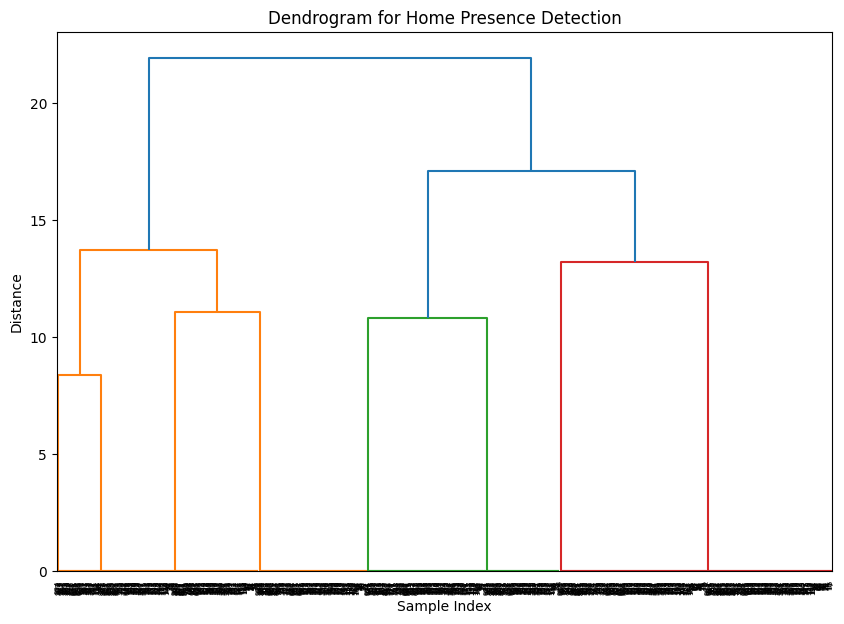

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Uvoz podatkov
podatki = pd.read_csv("PametniDomPodatki/HomeC_example.csv")

# Pretvorba časovnih žigov
podatki['time'] = pd.to_datetime(podatki['time'])

# Binarizacija podatkov za naprave
threshold_microwave = 0.05
threshold_lights = 0.2
threshold_tv = 0.1

podatki['Microwave Binary'] = (podatki['Microwave [kW]'] > threshold_microwave).astype(int)
podatki['Lights Binary'] = (podatki['Lights [kW]'] > threshold_lights).astype(int)
podatki['TV Binary'] = (podatki['TV [kW]'] > threshold_tv).astype(int)

# Ustvarimo matriko značilnosti za clustering
features = podatki[['Microwave Binary', 'Lights Binary', 'TV Binary']]

# Izvedemo hierarhično grozdenje
Z = linkage(features, method='ward')

# Narišemo dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram for Home Presence Detection")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


<Axes: >

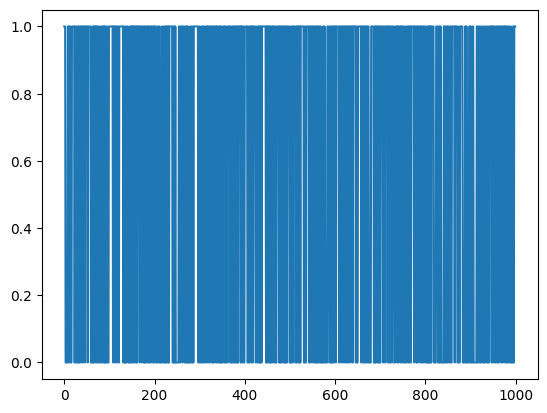

In [ ]:
#podatki['Microwave Binary'].plot()
#podatki['Lights Binary'].loc[0:1000].plot()
podatki['TV Binary'].plot()

In [ ]:
#graph for one day = 86400s
plt.figure()
plt.plot(podatki['time'][0:86500], podatki['Microwave [kW]'][0:86500])
plt.xlabel("Time")
plt.ylabel("Microwave [kW]")
plt.title("Graf poteka Microwave v odvisnosti od time dan")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = dataset[['Microwave Binary', 'Living Room Binary', 'Door Binary']][0:503910]


# Standardizacija podatkov
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Zmanjšanje dimenzionalnosti z uporabo PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Uporaba vzorčenja za zmanjšanje števila vzorcev
sample_size = 1000  # Prilagodite velikost vzorca glede na vaše zmogljivosti
sampled_indices = np.random.choice(features_pca.shape[0], sample_size, replace=False)
sampled_features = features_pca[sampled_indices]

# Izvedba Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
clustering.fit(sampled_features)

# Funkcija za ustvarjanje dendrograma iz modela AgglomerativeClustering
def plot_dendrogram(model, **kwargs):
    # Otroci grozdov
    children = model.children_
    
    # Računanje razdalj med grozdi
    distance = np.arange(children.shape[0])
    no_of_observations = np.arange(2, children.shape[0] + 2)
    
    # Ustvarjanje matrike za dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    
    # Narišemo dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Narišemo dendrogram
plt.figure(figsize=(10, 7))
plot_dendrogram(clustering, truncate_mode='level', p=3)
plt.title("Dendrogram for Home Presence Detection using AgglomerativeClustering")
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
plt.ylabel("Distance")
plt.show()